In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
file = "/content/drive/My Drive/thinktac_ICRrar.rar"
!pip install rarfile
!pip install patool
from patoolib import extract_archive
import os
extract_to = 'ICR'
os.mkdir(extract_to) 
extract_archive(file, outdir=extract_to)

     |████████████████████████████████| 122kB 2.8MB/s 
  Created wheel for rarfile: filename=rarfile-3.1-cp36-none-any.whl size=24908 sha256=67a6f8a44b87e983c1b6185ffd02d6a0ffab3ae1624c78f5283de650e9641cec
  Stored in directory: /root/.cache/pip/wheels/23/3c/c8/0215b6a5079492eff3be3f545ae0b0c4a66734c35c9e444eac
Successfully built rarfile
     |████████████████████████████████| 81kB 2.3MB/s 
patool: Extracting /content/drive/My Drive/thinktac_ICRrar.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/thinktac_ICRrar.rar"
patool:     with cwd='ICR'
patool: ... /content/drive/My Drive/thinktac_ICRrar.rar extracted to `ICR'.


'ICR'

In [0]:
data_dir = '/content/ICR/ddd'

In [5]:
os.listdir(data_dir)

['train', 'test']

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:

test_path = data_dir+"/test/"
train_path = data_dir+"/train/"

In [8]:
os.listdir(test_path)

['K',
 'J',
 'D',
 'A',
 'I',
 'E',
 '3',
 'U',
 'Z',
 '5',
 'O',
 'X',
 'M',
 '6',
 'L',
 'W',
 'N',
 'H',
 'B',
 'R',
 'F',
 'T',
 '7',
 '9',
 'C',
 'P',
 '1',
 'S',
 '2',
 'V',
 'Q',
 '4',
 'G',
 '8',
 'Y']

In [0]:
num_classes = len(os.listdir(train_path))

In [10]:
os.listdir(train_path+'G')[0]

'G-2313.png'

In [0]:
image_1_file_location =train_path+'G/'+ 'G-4751.png'

In [12]:
image_1_file_location

'/content/ICR/ddd/train/G/G-4751.png'

In [13]:
imread(image_1_file_location).shape

(28, 28)

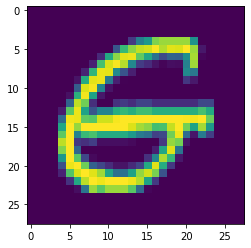

In [14]:
plt.imshow(imread(image_1_file_location))

In [0]:
image_shape = (28,28,1)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [18]:
image_gen.flow_from_directory(train_path)

Found 425512 images belonging to 35 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout

In [20]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))


model.add(Conv2D(256, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#26 is the #of classes
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [0]:
batch_size = 512

In [24]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 425512 images belonging to 35 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 2661 images belonging to 35 classes.


In [26]:
train_image_gen.class_indices

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [0]:
results = model.fit(train_image_gen,
                              epochs=200,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/200
832/832 [==============================] - 191s 229ms/step - loss: 0.0983 - acc: 0.9706 - val_loss: 1.0377 - val_acc: 0.7272
Epoch 2/200
832/832 [==============================] - 188s 226ms/step - loss: 0.0948 - acc: 0.9723 - val_loss: 1.0290 - val_acc: 0.7306
Epoch 3/200
832/832 [==============================] - 187s 225ms/step - loss: 0.0909 - acc: 0.9731 - val_loss: 1.0983 - val_acc: 0.7136
Epoch 4/200
832/832 [==============================] - 187s 225ms/step - loss: 0.0885 - acc: 0.9739 - val_loss: 0.8914 - val_acc: 0.7512
Epoch 5/200
832/832 [==============================] - 187s 224ms/step - loss: 0.0864 - acc: 0.9741 - val_loss: 0.8724 - val_acc: 0.7696
Epoch 6/200
832/832 [==============================] - 188s 226ms/step - loss: 0.0834 - acc: 0.9748 - val_loss: 0.8130 - val_acc: 0.7738
Epoch 7/200
832/832 [==============================] - 189s 227ms/step - loss: 0.0822 - acc: 0.9756 - val_loss: 0.7581 - val_acc: 0.7944
Epoch 8/200
832/832 [====================

In [0]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=False)

Model Evaluations


In [0]:
test_image_gen.reset()

In [0]:
model.save('final_ICR')

In [0]:
model.evaluate_generator(test_image_gen)

In [0]:
train_image_gen

In [0]:
model.metrics_names

In [0]:
scores = model.evaluate(test_image_gen, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Acuracy: %.2f%%" % (scores[1]*100))

In [0]:
#pred = model.predict_generator(test_image_gen)

In [0]:
pred= model.predict_generator(test_image_gen)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_image_gen.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predicted_class_indices, test_image_gen.classes))

In [0]:
print(classification_report(test_image_gen.classes,predicted_class_indices))

In [0]:
test_image_gen.classes.shape

In [0]:
#print(classification_report(test_image_gen.classes,predictions))

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
my_image = image.load_img(image_1_file_location,target_size=image_shape,grayscale=True)

In [0]:
my_image

In [0]:
my_image_arr = image.img_to_array(my_image)
my_image_arr.shape

In [0]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)
my_image_arr.shape

## Input size of image (1, 28, 28, 1)

In [0]:
 p = model.predict_classes(my_image_arr)

In [0]:
#train_image_gen.class_indices

In [0]:
labels2[p[0]]

In [0]:
print(f"Predicted Label is {labels2[p[0]]}")